In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # 特征扩展器
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
##生成原始数据
np.random.seed=21
x = (np.linspace(-3,3,50)).reshape((-1,1))
y = 0.2 + x**2
# 加上随机数，随机数符合正态分布，均值为0，方差为2
# reshape((-1,1)) 任意行一列
y_train=y+np.random.normal(0,2,size=len(x)).reshape((-1,1))

In [3]:
y.shape

(50, 1)

In [4]:
y_train.shape

(50, 1)

In [5]:
# 多项式特征扩展
poly=PolynomialFeatures(degree=20)
poly.fit(x)
x_train=poly.transform(x)

In [6]:
##--------数据标准化及模型选择，给polynomial regression，不加正则化
model1 = Pipeline([
    ('sca', StandardScaler()), # 先进行归一化或标准化
    ('lin_reg', LinearRegression()),
])
##--------数据标准化及模型选择，给polynomial regression加入L2正则化
model2 = Pipeline([
    ('sca', StandardScaler()),
    ('ridge', Ridge(solver='cholesky')),
])
##--------数据标准化及模型选择，给polynomial regression加入L1正则化
model3 = Pipeline([
    ('sca', StandardScaler()),
    ('lasso', Lasso()),
])

In [7]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

Pipeline(steps=[('sca', StandardScaler()), ('lasso', Lasso())])

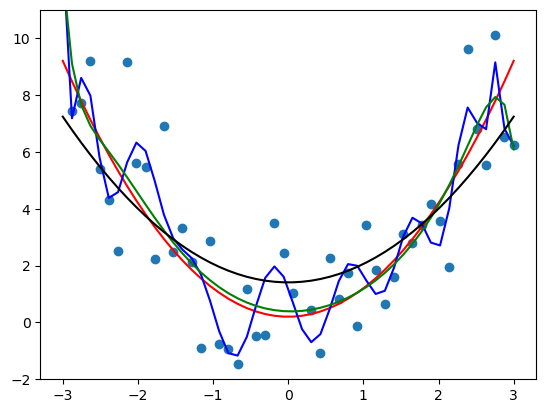

In [8]:
plt.ylim(-2,11)
plt.plot(x,y,'r')# 无噪音原始函数关系
plt.scatter(x,y_train)# 加入噪音后的散点图
plt.plot(x,model1.predict(x_train),'b')# 无正则项的多项式回归
plt.plot(x,model2.predict(x_train),'g')# L2正则化的多项式回归
plt.plot(x,model3.predict(x_train),'black')# L1正则化的多项式回归
plt.show()

**结论:**   
上图红线为期望，输出蓝色线为无正则项的多项式回归结果，过拟合现象很严重，在加入正则项后过拟合现象基本消失。